In [1]:
import numpy as np
import matplotlib
from matplotlib import transforms, pyplot as plt

%matplotlib inline
#%matplotlib

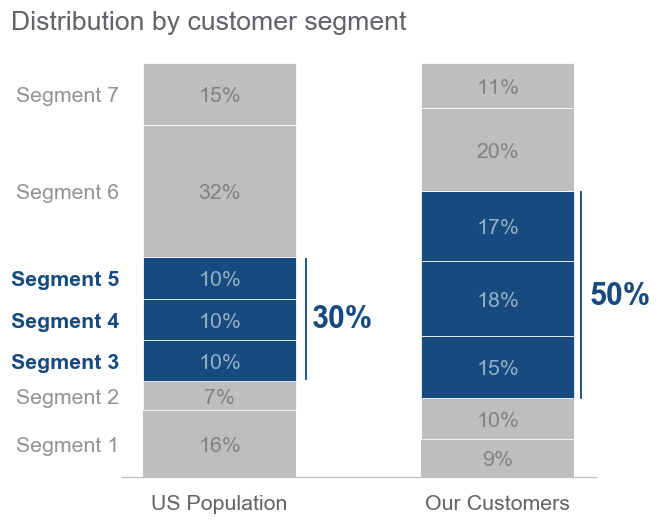

In [2]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

# segments distribution
X = ['Segment ' + str(i) for i in range(1, 8)]
Y = [16, 7,  10, 10, 10, 32, 15] # US Population
Z = [9,  10, 15, 18, 17, 20, 11] # Our Customers

# Silver
color_gray1 = '#BFBEBE'
# Smoky
color_gray2 = '#646369'
# Gray
color_gray3 = '#828282'
# Aluminium
color_gray4 = '#929497'
# Chathams Blue
color_blue1 = '#174A7E'
# Nepal
color_blue2 = '#94AFC5'

# create new figure
fig, ax1 = plt.subplots(figsize=(7, 5), # width, height in inches 
                        dpi=110)        # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.154, right=0.77, top=0.89, bottom=0.1)

# colors for bars drawing, numerical labeling and name labeling
C = [color_gray1]*2 + [color_blue1]*3 + [color_gray1]*2
CT = [color_gray3]*2 + [color_blue2]*3 + [color_gray3]*2
CL = [color_gray4]*2 + [color_blue1]*3 + [color_gray4]*2

# draw stacked bars plot
bottom = np.array([0, 0]) # bottom accumulates starting points 
for i in range(len(X)):
    bars = plt.bar([0, 1],
                   [Y[i], Z[i]],
                   bottom=bottom,     # for stacking
                   color=C[i],
                   # for white borders
                   edgecolor=('white', 'none')[i == 0], 
                   linewidth=0.5,
                   width=0.55)        # enlarge whitespace between    
    
    ax1.text(-0.36,
             Y[i]/2 + bottom[0] - 1.9,
             X[i],                    
             fontsize=14,
             horizontalalignment='right',
             color=CL[i],
             # use bold for blue color text
             fontweight=('normal', 'bold')[CL[i] == color_blue1])
    # add numerical data labels for each bar
    for bi, b in enumerate(bars):
        value = (Y[i], Z[i])[b.get_x() > 0]          # is it letf bar or right
        ax1.text(b.get_x() + b.get_width()/2,        # x-center of bar
                 b.get_y() + b.get_height()/2 - 1.9, # y-center of bar
                 str(value)+'%',                     # value with %
                 fontsize=14,
                 horizontalalignment='center',
                 color=CT[i])

    bottom += np.array([Y[i], Z[i]])

# change the appearance of ticks, tick labels, and gridlines
ax1.tick_params(bottom='off', left='off', labelleft='off', labelbottom='on')

# remove chart borders
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# set category tick locations and labels of the x-axis
plt.xticks([0, 1], ['US Population', 'Our Customers'])

# configure responses labels appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(color_gray2)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)
    
# set bottom border color
ax1.spines['bottom'].set_color(color_gray1)

# title the plot
ax1.text(-0.75, 108, 'Distribution by customer segment', color=color_gray2, fontsize=17.4)

# add vertical reference lines
ax1.axvline(0.31, ymin=0.225, ymax=0.5, color=color_blue1, linewidth=1.2)
ax1.axvline(1.3, ymin=0.18, ymax=0.655, color=color_blue1, linewidth=1.2)

# add text to reference lines
ax1.text(0.33, 36, '30%', fontweight='bold', fontsize=20, color=color_blue1)
ax1.text(1.33, 41.5, '50%', fontweight='bold', fontsize=20, color=color_blue1)